In [2]:
import math
x = 3*math.pi/2
def f(n):
    return ((-1)**n) * (x**(2*n+1)) / math.factorial(2*n + 1)
print(sum(map(f, range(15))))

-0.9999999999999121


In [7]:
output=[]
for i in range(15):
    output.append(2*i)
print(output)

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]


In [8]:
def map(func, iterable):
    output = [] # Empty list for output
    for i in iterable:
        output.append(func(i))
    return output

In [9]:
sum(map(f, range(15)))

-0.9999999999999121

In [4]:
range(15)

range(0, 15)

In [3]:
n = 0
def f(x):
    return (x**3) - (6*x**2) + (4*x) + 12
def compute_root(f, x0, x1, xmid, tol, max_it):
    x0, x1, tol, max_it = 3, 6, 1e-8, 1000
    while abs(f(xmid)) >= tol or i > max_it:
        print(n) # DEBUG
        n = n+1
        xmid = (x0 + x1)/2
        if f(x0)*f(xmid) < 0:
              x1 = xmid
        else:
              x0 = xmid
    return xmid
    return n
    return f(xmid)

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

try:
    import quandl
except ImportError:
    import sys
    if 'conda' in sys.version:  # Install using conda if we're using Anaconda Python
        !conda install -yc conda-forge quandl
    else:  # Install using pip on others systems
        try:
            !{sys.executable} -m pip -q install quandl  # Try to install globally
            import quandl
        except ImportError:
            !{sys.executable} -m pip -q install --user quandl  # Install in user space

try:
    import ipywidgets
except ImportError:
    try:
        !{sys.executable} -m pip -q install ipywidgets
        import ipywidgets
    except ImportError:
        !{sys.executable} -m pip -q --user install ipywidgets
    finally:
        !jupyter nbextension enable --py widgetsnbextension
        print("You will need to refresh your browser page")
        
####################

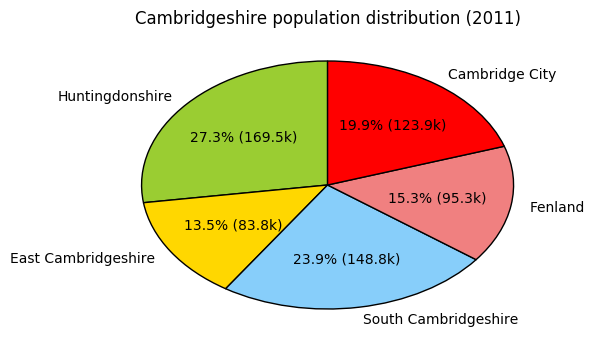

In [42]:
# Part IA Computing: Michaelmas Term
# Edwin Bahrami Balani (eb677@cam.ac.uk)

# Exercise 08.3
from ipywidgets import interact, HBox, Label, IntSlider

district = ('Cambridge City', 'East Cambridgeshire', 'Fenland', 'Huntingdonshire',
            'South Cambridgeshire')
population = (123900, 83800, 95300, 169500, 148800)
start_year = 2011
starting_pops = dict(zip(district, population))

colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'red']

slider_dict = {x: ipywidgets.FloatSlider(min=0.0, max=10.0, step=0.1,
                                         value=0.0, continuous_update=False)
               for x in district}

# Taken and adapted from http://stackoverflow.com/a/6170354
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.1f}% ({v:1.1f}k)'.format(p=pct,v=val/1000)
    return my_autopct


@interact(current_year = IntSlider(min=2011, max=2021, step=1, 
                                   value=2011, description='Current year'),
          **slider_dict)
def dopie(current_year, **kwargs):
    growthrates = {i: kwargs[i]/100 for i in kwargs}
    yeardifference = current_year - start_year
    
    current_pops = {k: starting_pops[k] * (1+growthrates[k])**yeardifference for k in starting_pops}
    # Produce pie chart. The slices will be ordered and plotted counter-clockwise.
    values = list(current_pops.values())
    keys = current_pops.keys()
    plt.pie(values, labels=keys, colors=colors,
            autopct=make_autopct(values), startangle=90)

    # Add title
    plt.title("Cambridgeshire population distribution ({})".format(current_year))